"""Which Classifier is Should I Choose?
This is one of the most import questions to ask when approaching a machine learning
problem.I find it easier to just test them all at once. """

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn

from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import StratifiedShuffleSplit

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
import sys


print ('Total Number of arguments:', len(sys.argv), 'arguments.')
print ('Argument List:', str(sys.argv))
print (sys.argv[0])


Total Number of arguments: 3 arguments.
Argument List: ['C:\\Users\\atul\\Anaconda3\\lib\\site-packages\\ipykernel_launcher.py', '-f', 'C:\\Users\\atul\\AppData\\Roaming\\jupyter\\runtime\\kernel-30629129-f96d-40ac-be48-f71f2fa2050b.json']
C:\Users\atul\Anaconda3\lib\site-packages\ipykernel_launcher.py


In [3]:
#Data Preparation

In [4]:
# Swiss army knife function to organize the data
def encode(train, test):
    le = LabelEncoder().fit(train.species) 
    labels = le.transform(train.species) # encode species strings
    classes = list(le.classes_)       # save column names for submission
    test_ids = test.id                # save test ids for submission
    
    train = train.drop(['species', 'id'], axis=1)  
    test = test.drop(['id'], axis=1)
    
    return train, labels, test, test_ids, classes

train, labels, test, test_ids, classes = encode(train, test)
train.head(1)

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,...,0.007812,0.0,0.00293,0.00293,0.035156,0.0,0.0,0.004883,0.0,0.025391


"""Stratified Train/Test Split - Stratification is necessary for this dataset because
there is a relatively large number of classes (100 classes for 990 samples). This 
will ensure we have all classes represented in both the train and test indices"""

In [5]:
sss = StratifiedShuffleSplit(labels, 10, test_size=0.2, random_state=23)

for train_index, test_index in sss:
    X_train, X_test = train.values[train_index], train.values[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

"""Sklearn Classifiers
Simply looping through 4 classifiers and printing the results. Obviously, these 
will perform much better after tuning their hyperparameters, but this gives you
a decent ballpark idea."""

In [6]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [7]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB()]

In [8]:
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 88.8889%
Log Loss: 1.5755075129933762
SVC
****Results****
Accuracy: 81.8182%
Log Loss: 4.628612986932529
NuSVC
****Results****
Accuracy: 88.3838%
Log Loss: 2.4770326926779362
DecisionTreeClassifier
****Results****
Accuracy: 65.6566%
Log Loss: 11.86180199421185
RandomForestClassifier
****Results****
Accuracy: 87.8788%
Log Loss: 1.2991211446416937
GaussianNB
****Results****
Accuracy: 57.0707%
Log Loss: 14.827252492813216


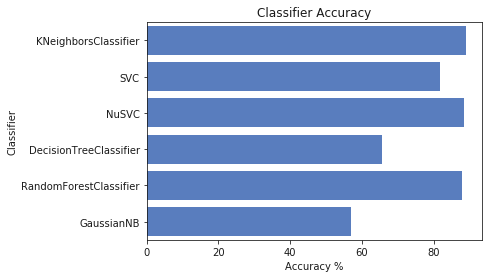

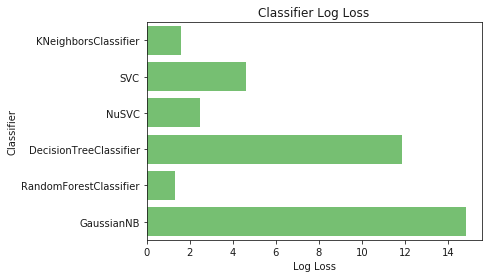

In [9]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

In [10]:
#After this choose the classifier with the best accuracy for future predictions